<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_02/blob/Question-1/G2_modelling_pollutant_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

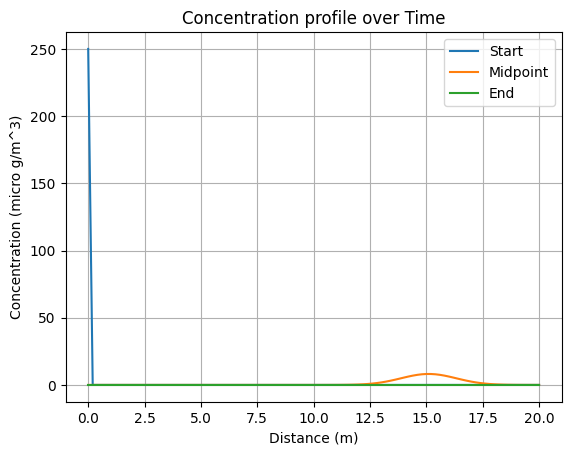

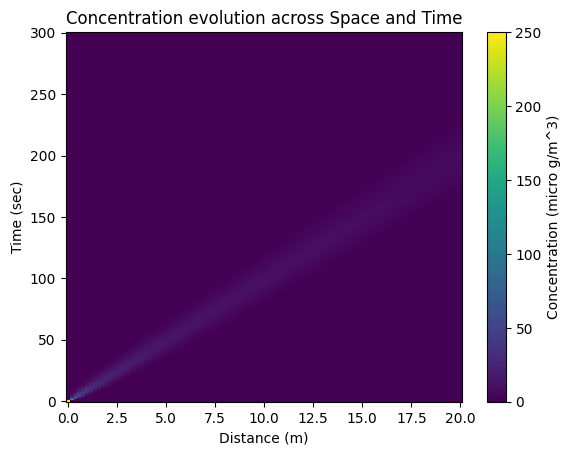

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




def create_domain(x_max,dx,t_max,dt):
  x = np.arange(0,x_max +dx ,dx)
  t = np.arange(0,t_max+dt,dt)
  return x,t

def initialise_concentration_delta(x, value=250):
  theta0=np.zeros_like(x)
  theta0[0]=value
  return theta0

def solve_advection(x,t,theta0, U):
  dx=x[1]-x[0]
  dt=t[1]-t[0]


  theta=np.zeros((len(t),len(x)))
  theta[0,:]=theta0
  nx=len(x)
  nt=len(t)
  for n in range (nt-1):
    for i in range(1,nx):
      theta[n+1,i]=theta[n,i]-U*dt/dx*(theta[n,i]-theta[n,i-1])
    theta[n+1,0]=0
  return theta

def plot_graphs(theta, x_grid, t_grid):
  plt.figure
  plt.plot(x_grid, theta[0,:],label="Start")
  plt.plot(x_grid, theta[len(t_grid)//2, :], label="Midpoint")
  plt.plot(x_grid, theta[-1,:], label="End")
  plt.xlabel("Distance (m)")
  plt.ylabel("Concentration (micro g/m^3)")
  plt.title("Concentration profile over Time")
  plt.grid(True)
  plt.legend()
  plt.show()
  plt.figure()
  plt.pcolormesh(x_grid, t_grid, theta)
  plt.colorbar(label="Concentration (micro g/m^3)")
  plt.xlabel("Distance (m)")
  plt.ylabel("Time (sec)")
  plt.title("Concentration evolution across Space and Time")
  plt.show()

#Solving question 1 using the given values

x_max=20
dx=0.2
t_max=300
dt=1
U=0.1
x_grid,t_grid=create_domain(x_max,dx,t_max,dt)
theta0 = initialise_concentration_delta(x_grid)
theta = solve_advection(x_grid, t_grid, theta0, U)
plot_graphs(theta,x_grid, t_grid)



